# 1)	Analyse des données
Charger la base de données (dataset.dat). Diviser la base de données aléatoirement (fonction train_test_split) en deux corpus (les classes sont équi-représentées dans les deux corpus) :

- base d’apprentissage (X_train, y_train) : 70% des données
- base de test (X_test, y_test): le reste (30% des données)

Afficher les données d’apprentissage et de test (fonction pyplot.show). Préciser la dimension des exemples, le nombre de classe, le nombre d’exemples d’apprentissage et de test.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

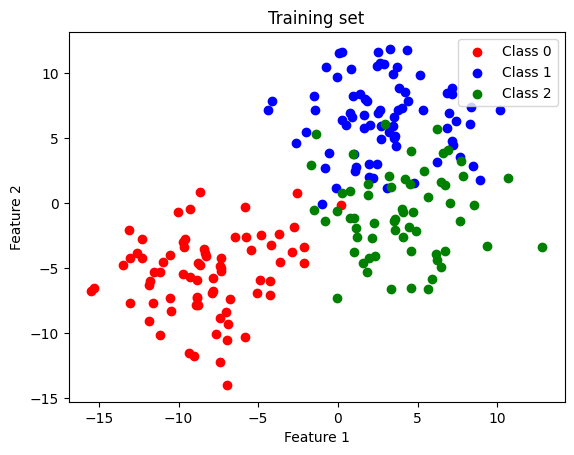

Dimension of the examples: 2
Number of classes: 3
Number of training examples: 210


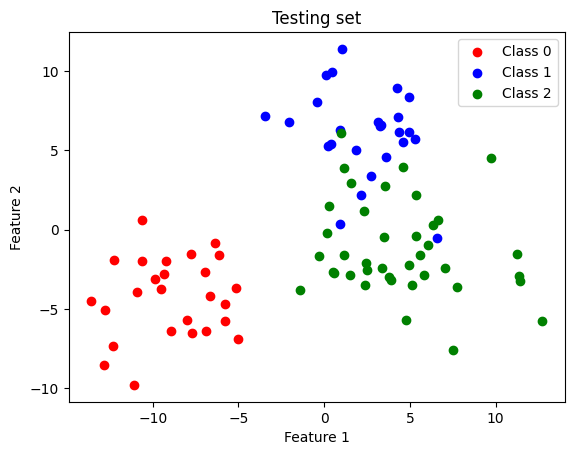

In [2]:


# Load the dataset
dataset = np.loadtxt('dataset.dat')

# Split the dataset into X and y
X = dataset[:, :-1]
y = dataset[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

# Display the training
plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
plt.title('Training set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Display the testing
plt.figure()
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', label='Class 2')
plt.title('Testing set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


# Display the dimension, number of classes, number of training examples and number of testing examples
print('Dimension of the examples:', X_train.shape[1])
print('Number of classes:', len(np.unique(y_train)))
print('Number of training examples:', len(y_train))





# 2)	Algorithme du plus-proche-voisin
a)	Définir un classifieur du (1-)plus-proche-voisin : one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')

In [3]:
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')

b)	Le régler sur la base d’apprentissage (fonction fit).

In [4]:
one_NN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

c)	Evaluer le taux de reconnaissance le taux de reconnaissance sur les bases d’apprentissage et de test (fonction score). Déterminer la matrice de confusion.

In [5]:
# Evaluate the recognition rate on the training and testing sets
print('Recognition rate on the training set:', one_NN.score(X_train, y_train))
print('Recognition rate on the testing set:', one_NN.score(X_test, y_test))

Recognition rate on the training set: 1.0
Recognition rate on the testing set: 0.8888888888888888


d)	Afficher les frontières de décision définies par les données d’apprentissage. Vérifier qu’elles correspondent à l’attendu.

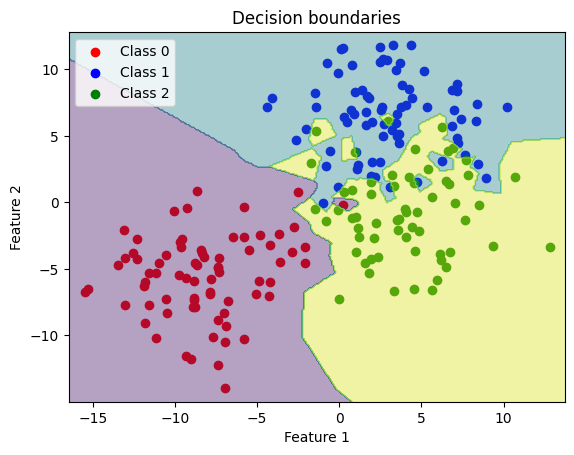

In [6]:
# Display the decision boundaries
plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
plt.title('Decision boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Create a grid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()



e)	Afficher les frontières de décisions et les données de test. Retrouver les erreurs de classification.


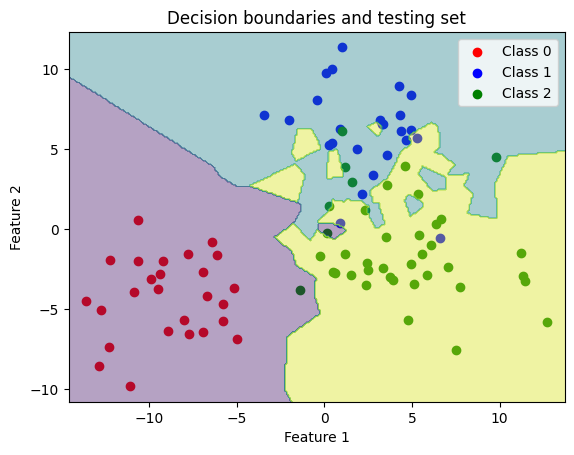

In [7]:
# Display the decision boundaries and the testing set
plt.figure()
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', label='Class 2')
plt.title('Decision boundaries and testing set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Create a grid of points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()


# 3)	Analyse du fonctionnement de l’algorithme
a)	On utilise toute la base de test. Générer une base d’apprentissage X_train1 dont la taille varie de 1% à 100% de X_train. Evaluer l’algorithme du ppv sur X_test, en utilisant X_train1. Stocker le taux de reconnaissance. Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples d’apprentissage). Expliquer l’influence du nombre d’exemples d’apprentissage sur le taux de reconnaissance et le temps de classification.

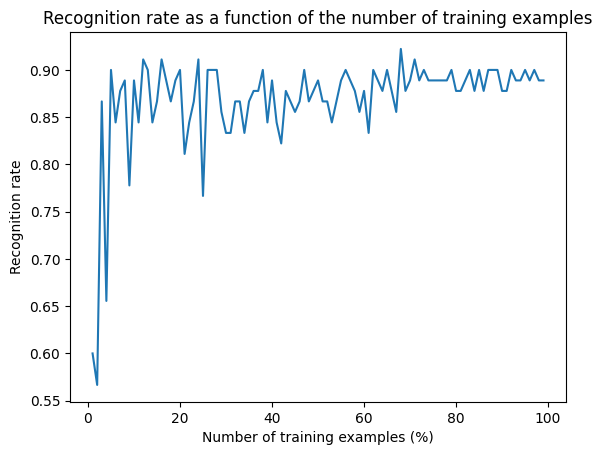

In [8]:
# Initialize the recognition rates
recognition_rates = []

for i in range(1, 100):
    train_size = i / 100
    X_train1, _, y_train1, _ = train_test_split(X_train, y_train, train_size= train_size)
    one_NN.fit(X_train1, y_train1)
    recognition_rates.append(one_NN.score(X_test, y_test))

# Display the recognition rates
plt.figure()
plt.plot(range(1, 100), recognition_rates)
plt.title('Recognition rate as a function of the number of training examples')
plt.xlabel('Number of training examples (%)')
plt.ylabel('Recognition rate')
plt.show()



b)	On utilise toute la base d’apprentissage. Générer une base de test X_test1 dont la taille varie de 1% à 100% de X_test. Evaluer l’algorithme du ppv sur X_test1, en utilisant X_train. Stocker le taux de reconnaissance. Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples de test). Expliquer l’influence du nombre d’exemples de test sur le taux de reconnaissance.


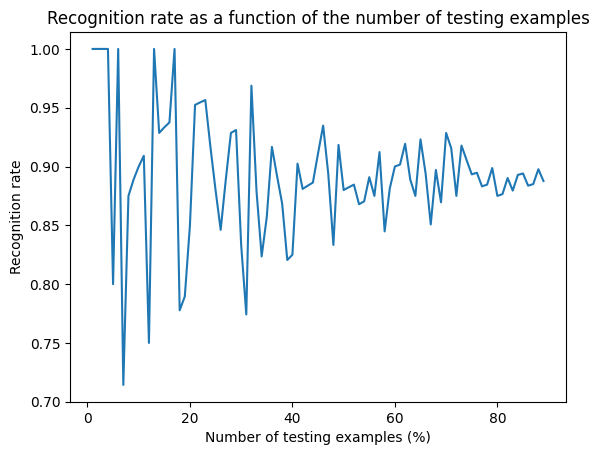

In [9]:
# Initialize the recognition rates
recognition_rates = []

for i in range(1, X_test.shape[0]):
    test_size = i
    _, X_test1, _, y_test1 = train_test_split(X_test, y_test, test_size= test_size)
    one_NN.fit(X_train, y_train)
    recognition_rates.append(one_NN.score(X_test1, y_test1))

# Display the recognition rates
plt.figure()
plt.plot(range(1, X_test.shape[0]), recognition_rates)
plt.title('Recognition rate as a function of the number of testing examples')
plt.xlabel('Number of testing examples (%)')
plt.ylabel('Recognition rate')
plt.show()

# 4)	Algorithme des k-ppv
a)	Tester la fonction KNeighborsClassifier en faisant varier le paramètre k de 1 à une valeur maximum kmax choisie judicieusement et justifiée.

In [10]:
# Initialize the recognition rates
recognition_rates = []

for k in range(1, 20):
    k_NN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    k_NN.fit(X_train, y_train)
    recognition_rates.append(k_NN.score(X_test, y_test))


b)	Observer l’influence du paramètre k sur le taux d’erreur en test : tracer le graphe (taux de reconnaissance en fonction de k). Donner la valeur optimale k* (qui minimise l’erreur en test) de k.

Optimal value of k: 3
Maximum value of k: 0.9111111111111111


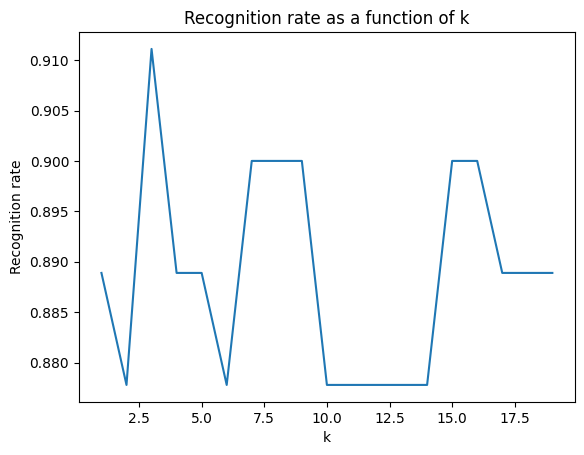

In [11]:
# Display the recognition rates
plt.figure()
plt.plot(range(1, 20), recognition_rates)
plt.title('Recognition rate as a function of k')
plt.xlabel('k')
plt.ylabel('Recognition rate')

# Find the optimal value of k
k_opt = np.argmax(recognition_rates) + 1
print('Optimal value of k:', k_opt)

# Find the maximum value of k
k_max = np.max(recognition_rates)
print('Maximum value of k:', k_max)

plt.show()

c)	Afficher les frontières de décision pour :
- k = 1
- k = k*
- k = kmax
Conclure sur l’impact de k sur la forme des frontières et justifier qualitativement la valeur k*.
Dans ces trois situations, que peut-on dire du biais et de la variance ?

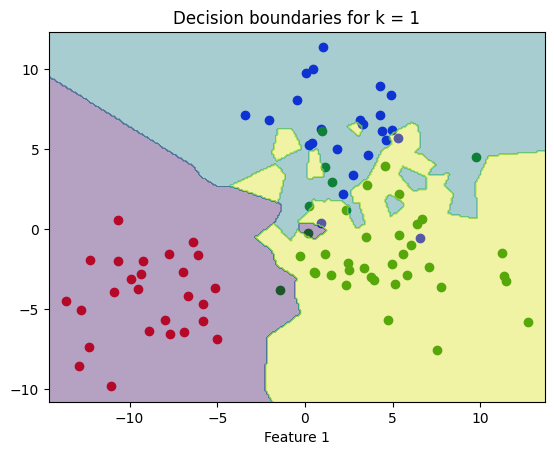

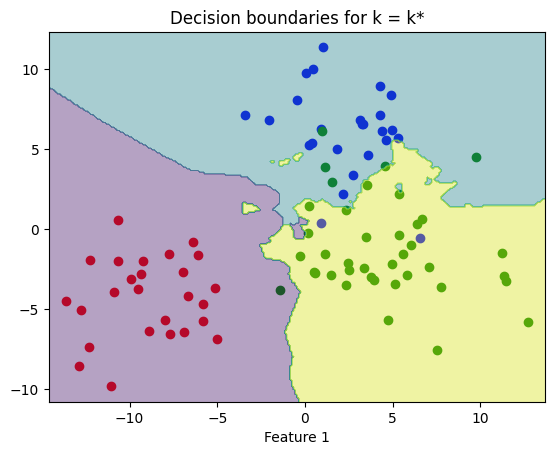

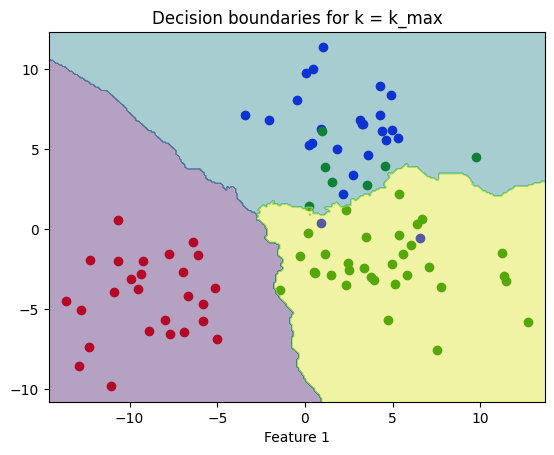

In [12]:
# Display the decision boundaries for k = 1
k_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
k_NN.fit(X_train, y_train)
plt.figure()
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', label='Class 2')
plt.title('Decision boundaries for k = 1')
plt.xlabel('Feature 1')

# Create a grid of points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = k_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

# Display the decision boundaries for k = k*
k_NN = KNeighborsClassifier(n_neighbors=k_opt, algorithm='brute')
k_NN.fit(X_train, y_train)
plt.figure()
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', label='Class 2')
plt.title('Decision boundaries for k = k*')
plt.xlabel('Feature 1')

# Predict the class of each point in the grid
Z = k_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

# Display the decision boundaries for k = k_max
k_NN = KNeighborsClassifier(n_neighbors=20, algorithm='brute')
k_NN.fit(X_train, y_train)
plt.figure()
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', label='Class 2')
plt.title('Decision boundaries for k = k_max')
plt.xlabel('Feature 1')

# Predict the class of each point in the grid
Z = k_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()


d)	Observer l’influence du paramètre k sur le taux d’erreur en apprentissage : tracer le graphe (taux de reconnaissance en fonction de k).

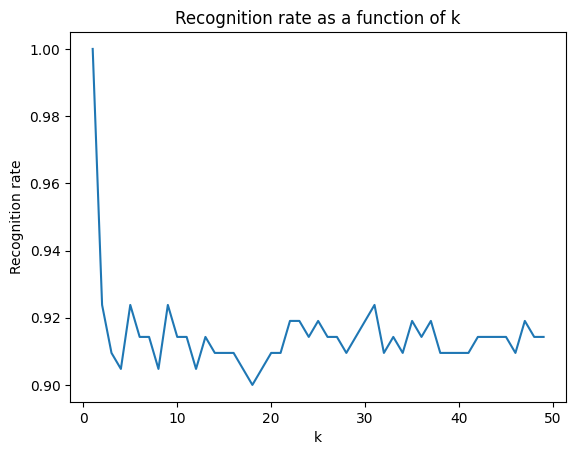

In [13]:
# Initialize the recognition rates
recognition_rates = []

for k in range(1, 50):
    k_NN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    k_NN.fit(X_train, y_train)
    recognition_rates.append(k_NN.score(X_train, y_train))

# Display the recognition rates
plt.figure()
plt.plot(range(1, 50), recognition_rates)
plt.title('Recognition rate as a function of k')
plt.xlabel('k')
plt.ylabel('Recognition rate')
plt.show()



e)	Le protocole mis en œuvre pour régler le paramètre k est-il satisfaisant ? Justifier votre réponse.


In [14]:
# Le protocole utilisé pour régler le paramètre k n'est pas satisfaisant car il est basé sur le taux de reconnaissance sur l'ensemble de test. La valeur optimale de k devrait être déterminée en utilisant la validation croisée.

# Bonus

Optimal value of k: 29
Maximum value of k: 0.9111111111111111


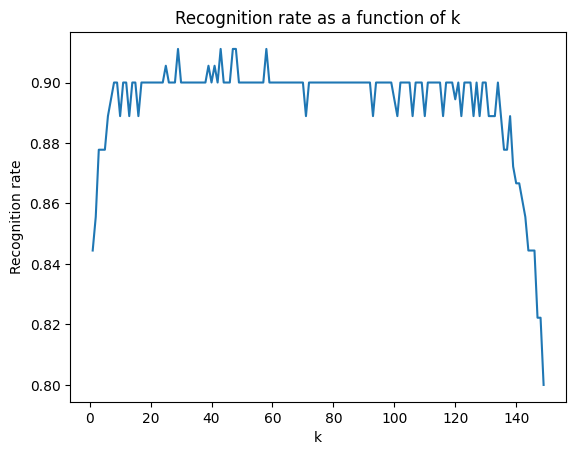

In [15]:
recognition_rates = []
recognition_rates_average = []

for k in range(1, 150):
    for i in range (150):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
        k_NN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        k_NN.fit(X_train, y_train)
        recognition_rates_average.append(k_NN.score(X_test, y_test))
    recognition_rates.append(np.median(recognition_rates_average))
    recognition_rates_average = []

# Display the recognition rates
plt.figure()
plt.plot(range(1, 150), recognition_rates)
plt.title('Recognition rate as a function of k')
plt.xlabel('k')
plt.ylabel('Recognition rate')

# Find the optimal value of k
k_opt = np.argmax(recognition_rates) + 1
print('Optimal value of k:', k_opt)

# Find the maximum value of k
k_max = np.max(recognition_rates)
print('Maximum value of k:', k_max)

plt.show()

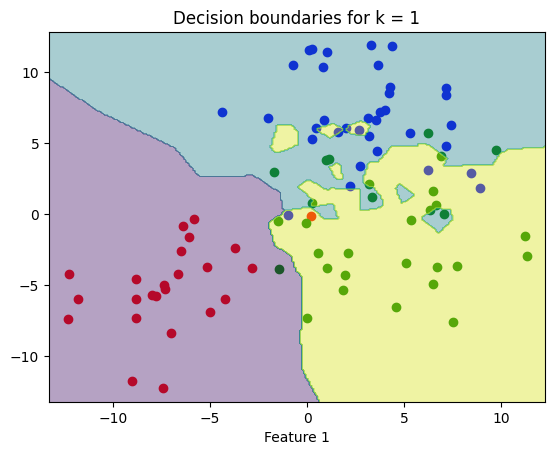

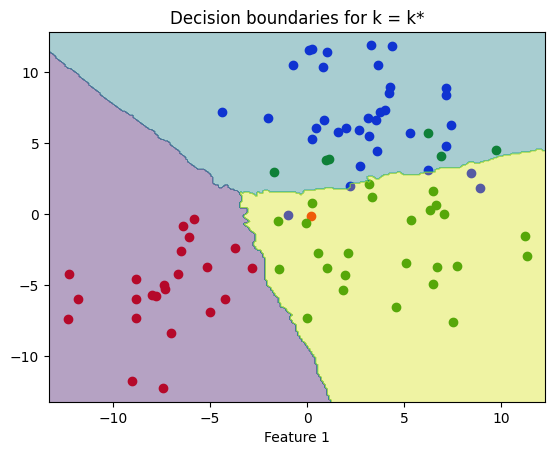

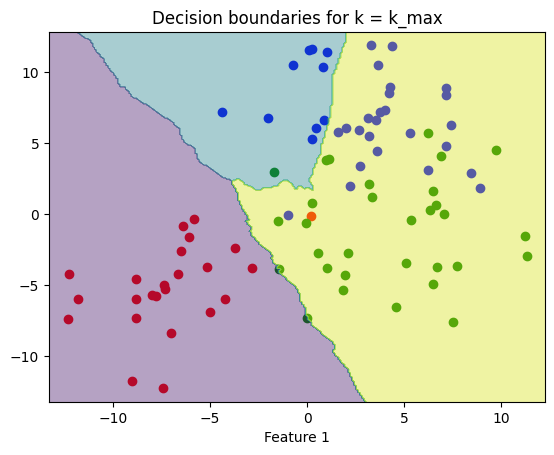

In [16]:
# Display the decision boundaries for k = 1
k_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
k_NN.fit(X_train, y_train)
plt.figure()
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', label='Class 2')
plt.title('Decision boundaries for k = 1')
plt.xlabel('Feature 1')

# Create a grid of points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = k_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

# Display the decision boundaries for k = k*
k_NN = KNeighborsClassifier(n_neighbors=k_opt, algorithm='brute')
k_NN.fit(X_train, y_train)
plt.figure()
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', label='Class 2')
plt.title('Decision boundaries for k = k*')
plt.xlabel('Feature 1')

# Predict the class of each point in the grid
Z = k_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

# Display the decision boundaries for k = k_max
k_NN = KNeighborsClassifier(n_neighbors=150, algorithm='brute')
k_NN.fit(X_train, y_train)
plt.figure()
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], color='green', label='Class 2')
plt.title('Decision boundaries for k = k_max')
plt.xlabel('Feature 1')

# Predict the class of each point in the grid
Z = k_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()